In [2]:
import numpy as np
import pandas as pd

## 1 Data Processing
-> Implement a data ingestion module that can handle various file
   formats (CSV, JSON, Excel)

-> Create a data cleaning and preprocessing pipeline

In [3]:
# Data ingestion module
def load_data(uploaded_file):
    if isinstance(uploaded_file, str): # Check if the input is a file path (string)
        if uploaded_file.endswith('.csv'):
            return pd.read_csv(uploaded_file)
        elif uploaded_file.endswith('.json'):
            return pd.read_json(uploaded_file)
        elif uploaded_file.endswith('.xlsx'):
            return pd.read_excel(uploaded_file)
        else:
            print("Unsupported file type")
            return None
    else: # Assuming it's a file object with a 'name' attribute
        if uploaded_file.name.endswith('.csv'):
            return pd.read_csv(uploaded_file)
        elif uploaded_file.name.endswith('.json'):
            return pd.read_json(uploaded_file)
        elif uploaded_file.name.endswith('.xlsx'):
            return pd.read_excel(uploaded_file)
        else:
            print("Unsupported file type")
            return None

In [4]:
data = load_data("olympics2024.csv")

In [5]:
data.head()

,Rank,Country,Country Code,Gold,Silver,Bronze,Total
0,1,United States,US,40,44,42,126
1,2,China,CHN,40,27,24,91
2,3,Japan,JPN,20,12,13,45
3,4,Australia,AUS,18,19,16,53
4,5,France,FRA,16,26,22,64


In [6]:
def preprocess_data(df):
    # Check for and print data types
    print("Data Types:")
    print(df.dtypes)

    # Identify categorical and numeric columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    numeric_cols = df.select_dtypes(include=['number']).columns

    print("\nCategorical Columns:")
    print(categorical_cols)

    print("\nNumeric Columns:")
    print(numeric_cols)

    # Check for duplicates
    num_duplicates = df.duplicated().sum()
    print(f"\nNumber of duplicate rows: {num_duplicates}")

    # Drop duplicate rows
    df = df.drop_duplicates()

    # Drop rows with null values
    df = df.dropna()

    return df, categorical_cols, numeric_cols

In [7]:
preprocessed_data, categorical_cols, numeric_cols = preprocess_data(data)

Data Types:
Rank             int64
Country         object
Country Code    object
Gold             int64
Silver           int64
Bronze           int64
Total            int64
dtype: object

Categorical Columns:
Index(['Country', 'Country Code'], dtype='object')

Numeric Columns:
Index(['Rank', 'Gold', 'Silver', 'Bronze', 'Total'], dtype='object')

Number of duplicate rows: 0


In [8]:
numeric_cols

Index(['Rank', 'Gold', 'Silver', 'Bronze', 'Total'], dtype='object')

## 2 Analysis Engine
-> Develop an analysis engine that can identify key trends and
   patterns in the data.
   
-> Implement at least three different statistical or machine
   learning algorithms for data analysis.

In [9]:
preprocessed_data.describe()

,Rank,Gold,Silver,Bronze,Total
count,91.000000,91.000000,91.000000,91.000000,91.000000
mean,45.307692,3.604396,3.593407,4.219780,11.417582
std,25.652244,6.990278,6.770816,6.558798,19.702829
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,23.500000,0.000000,0.000000,1.000000,2.000000
50%,44.000000,1.000000,1.000000,2.000000,5.000000
75%,68.000000,3.000000,3.000000,5.000000,9.000000
max,84.000000,40.000000,44.000000,42.000000,126.000000


In [10]:
corr_matrix = preprocessed_data[['Gold', 'Silver', 'Bronze', 'Total']].corr()
corr_matrix

,Gold,Silver,Bronze,Total
Gold,1.000000,0.910950,0.880670,0.960993
Silver,0.910950,1.000000,0.940045,0.979767
Bronze,0.880670,0.940045,1.000000,0.968379
Total,0.960993,0.979767,0.968379,1.000000


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error,accuracy_score

In [12]:
def test_multiple_algorithms(data, target_column):
    """
    Tests three machine learning algorithms on a dataset and prints evaluation metrics.

    Args:
        data (pandas.DataFrame): The input dataset.
        target_column (str): The name of the target column.

    Returns:
        None
    """

    X = data.drop(columns=[target_column])
    y = data[target_column]

    # Convert 'object' columns to numerical using one-hot encoding
    X = pd.get_dummies(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    algorithms = [
        ("Logistic Regression", LogisticRegression()),
        ("Decision Tree", DecisionTreeClassifier()),
        ("Random Forest", RandomForestClassifier()) ]

    for name, model in algorithms:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        print(f"\n{name}:\n")
        print(f"\n{name} Mean Squared Error:")
        print(mse)
        print(f"\n{name} Accuracy:")
        print(accuracy)

In [13]:
test_multiple_algorithms(preprocessed_data, 'Gold')

c:\Users\piyus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\piyus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\piyus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:147


Logistic Regression:


Logistic Regression Mean Squared Error:
27.789473684210527

Logistic Regression Accuracy:
0.5263157894736842

Decision Tree:


Decision Tree Mean Squared Error:
37.1578947368421

Decision Tree Accuracy:
0.7368421052631579

Random Forest:


Random Forest Mean Squared Error:
34.21052631578947

Random Forest Accuracy:
0.6842105263157895


c:\Users\piyus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\piyus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\piyus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

## 3. Report Generation
-> Create a module that can generate comprehensive reports based
   on the analysis results.

-> The reports should include visualisations (charts, graphs) and written summaries.

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
def plot_medals_of_country(df):
    plt.figure(figsize=(15, 10))
    sns.barplot(x='Country', y='Total', data=df, errorbar=None)
    plt.title('Total Medals by Country')
    plt.xticks(rotation=90,ha='right')
    plt.xlabel('Country')
    plt.ylabel('Total Medals')
    plt.show()

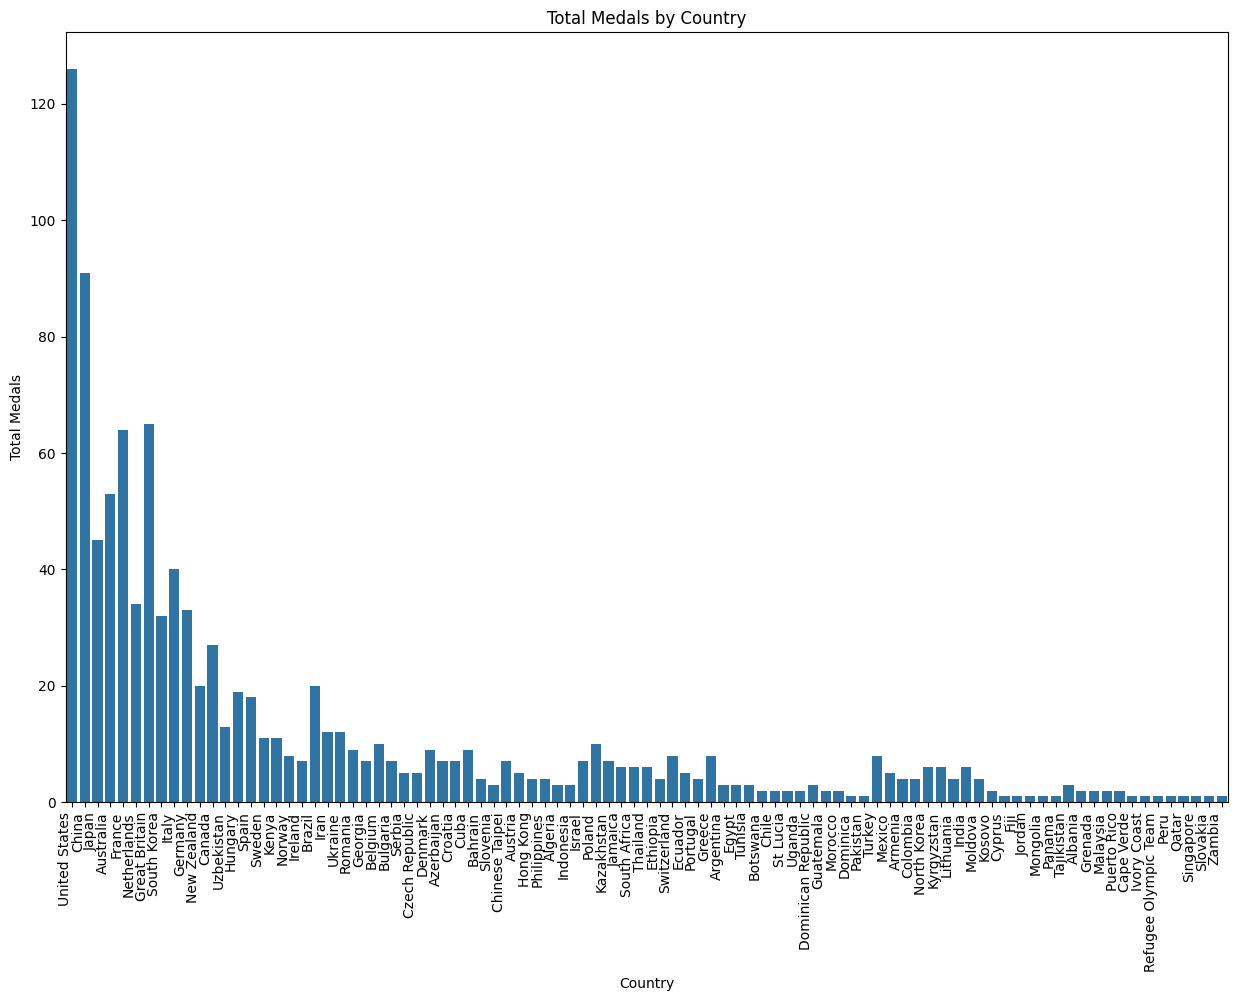

In [16]:
plot_medals_of_country(preprocessed_data)

In [17]:
def generate_correlation_heatmap(df, columns):
    corr_matrix = df[columns].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

def generate_histogram(df, column):
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=10)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')
    plt.show()

def generate_scatter_plot(df, x_column, y_column):
    plt.figure(figsize=(8, 6))
    plt.scatter(df[x_column], df[y_column], label=x_column, color='blue')
    plt.scatter(df[y_column], df[x_column], label=y_column, color='red')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f'{x_column} vs {y_column}')
    plt.show()
def plot_medal_counts(df, target_column):

  # Filter the DataFrame based on the target column
  df_filtered = df[['Country', target_column]]

  # Melt the DataFrame to long format
  df_melted = df_filtered.melt(id_vars='Country', var_name='medal_type', value_name='count')

  # Create the stacked bar plot
  # Use dodge=False for stacked barplots in newer versions of Matplotlib and Seaborn
  sns.barplot(x='Country', y='count', hue='medal_type', data=df_melted, dodge=False)

  # Customize the plot
  plt.title(f'{target_column} Medal Counts by Country')
  plt.xlabel('Country')
  plt.ylabel('Medal Count')
  plt.legend(title='Medal Type')
  plt.xticks(rotation=45)

  # Show the plot
  plt.show()

def generate_report(df, target_column):
    print(f"\nDistribution of {target_column} Medals:")
    generate_histogram(df, target_column)
    print(f"\nScatter Plot of {target_column} vs Total Medals:")
    generate_scatter_plot(df, target_column, 'Total')
    print(f"\nMedal Counts by Country for {target_column}:")
    plot_medal_counts(df, target_column)


Data Summary:
            Rank       Gold     Silver     Bronze       Total
count  91.000000  91.000000  91.000000  91.000000   91.000000
mean   45.307692   3.604396   3.593407   4.219780   11.417582
std    25.652244   6.990278   6.770816   6.558798   19.702829
min     1.000000   0.000000   0.000000   0.000000    1.000000
25%    23.500000   0.000000   0.000000   1.000000    2.000000
50%    44.000000   1.000000   1.000000   2.000000    5.000000
75%    68.000000   3.000000   3.000000   5.000000    9.000000
max    84.000000  40.000000  44.000000  42.000000  126.000000

Correlation Matrix:


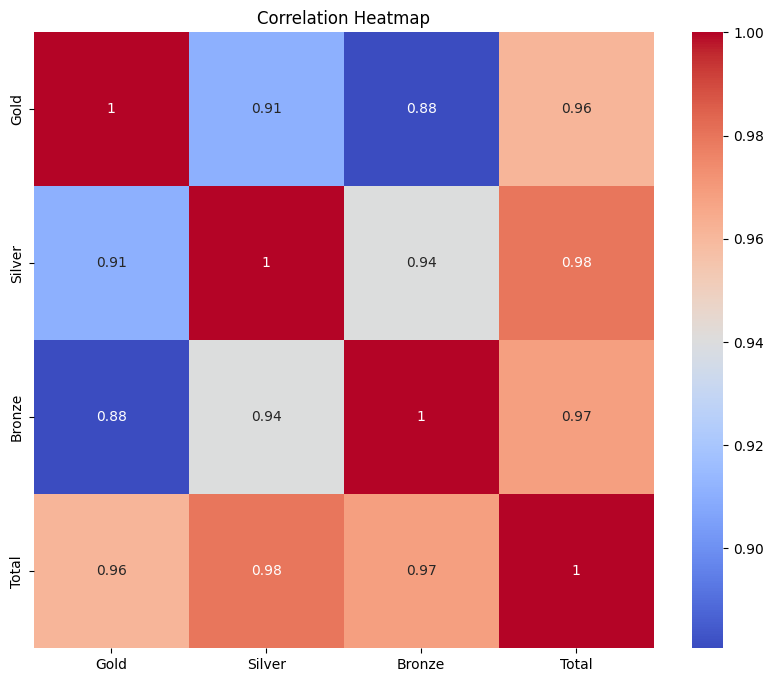

In [18]:
    print("Data Summary:")
    print(preprocessed_data.describe())
    print("\nCorrelation Matrix:")
    generate_correlation_heatmap(preprocessed_data, ['Gold', 'Silver', 'Bronze', 'Total'])


Distribution of Gold Medals:


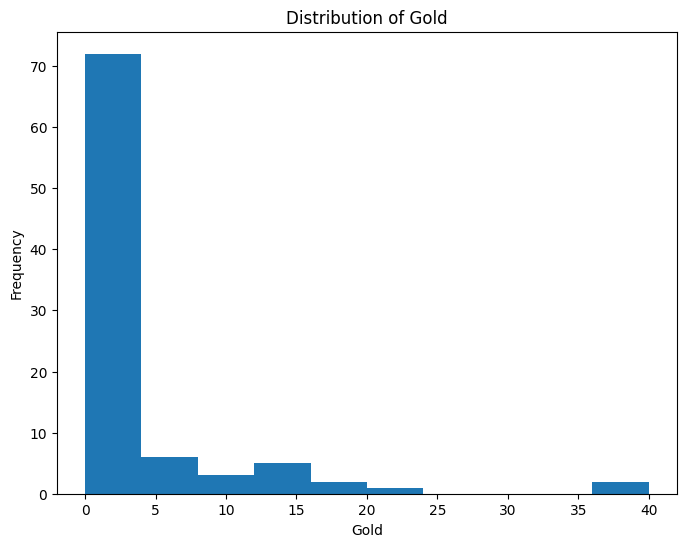


Scatter Plot of Gold vs Total Medals:


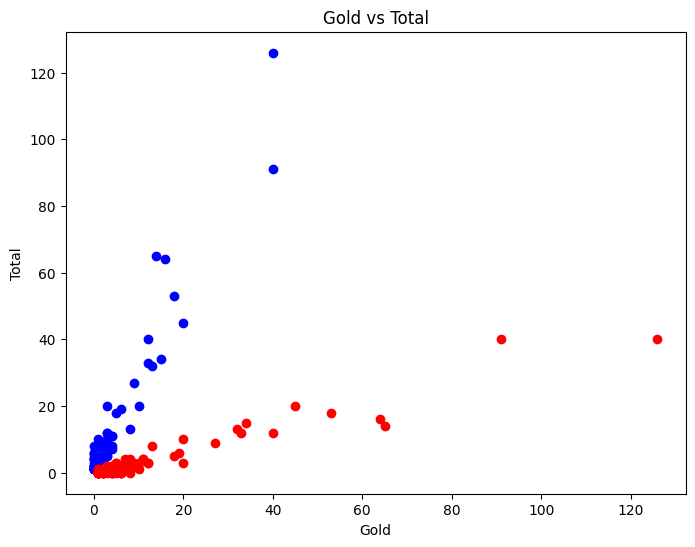


Medal Counts by Country for Gold:


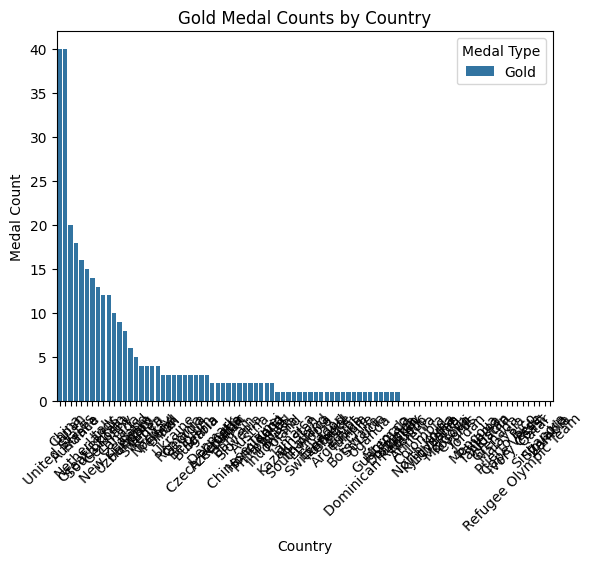


Distribution of Silver Medals:


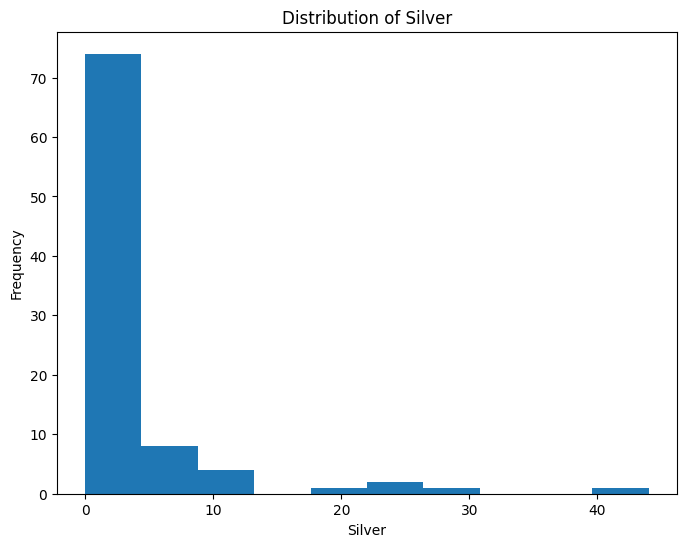


Scatter Plot of Silver vs Total Medals:


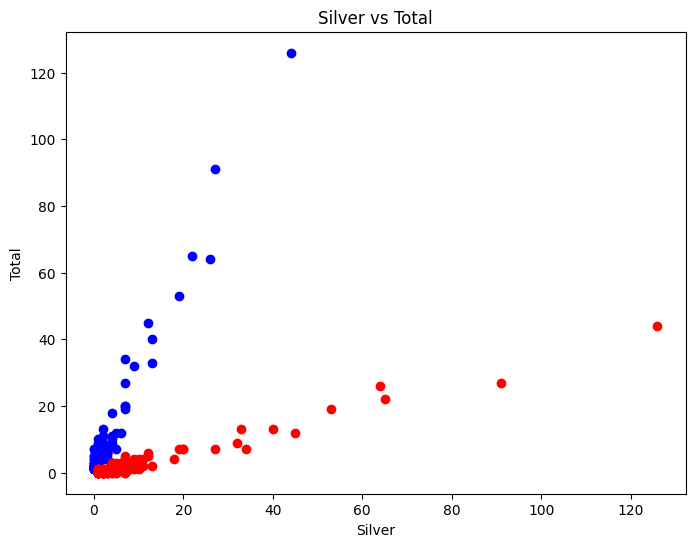


Medal Counts by Country for Silver:


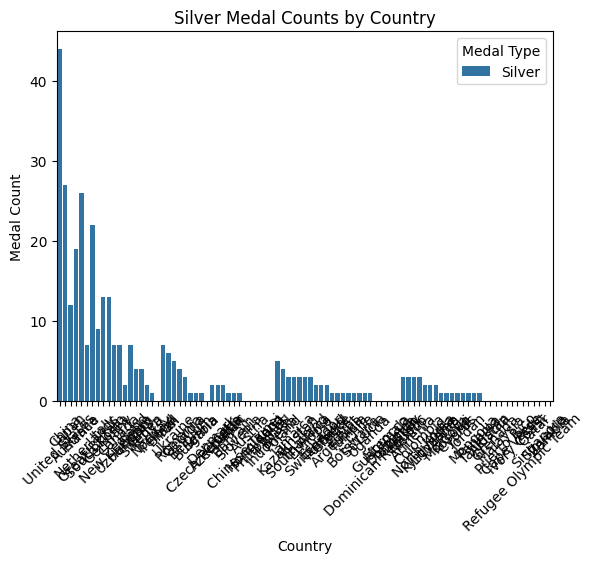


Distribution of Bronze Medals:


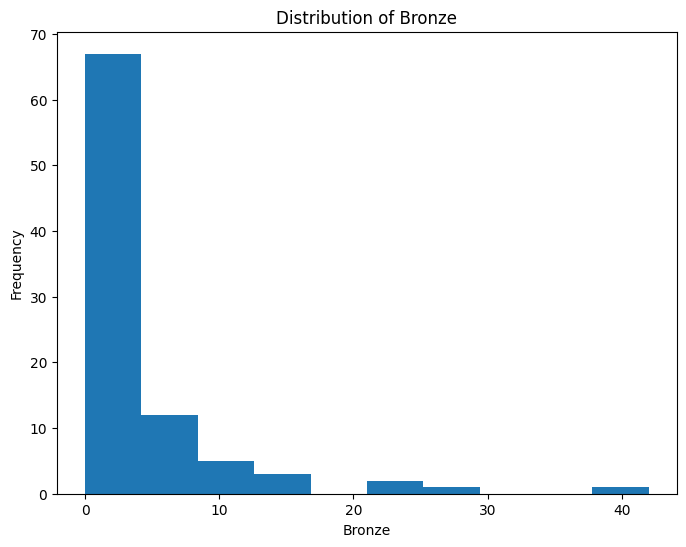


Scatter Plot of Bronze vs Total Medals:


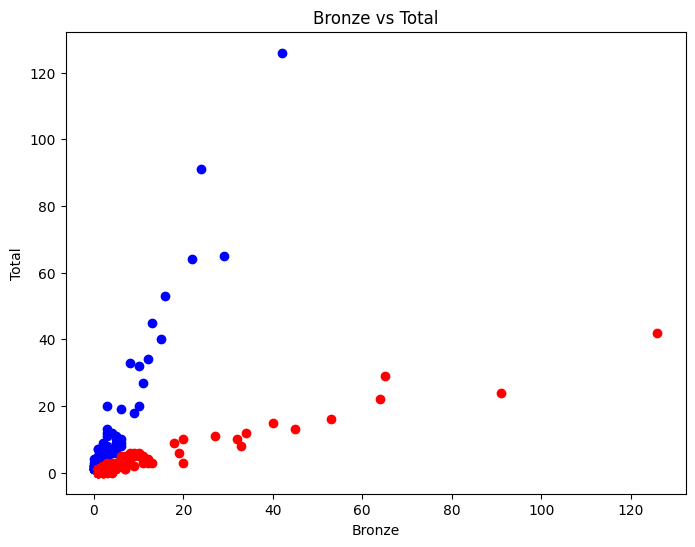


Medal Counts by Country for Bronze:


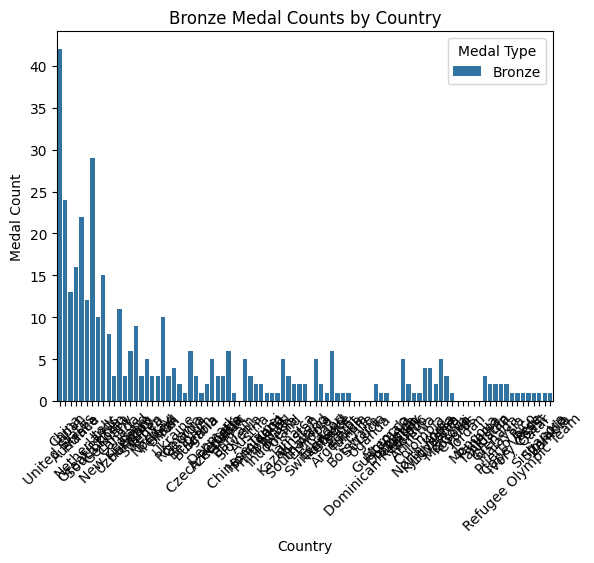

In [19]:
for col in numeric_cols[1:4]:
    generate_report(preprocessed_data, col)

##  4. User Interaction
-> Design a simple command-line interface for users to interact with the AI employee.

-> Implement basic natural language processing to understand user queries related to the data analysis.


In [20]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def process_query(query):
  """Processes a user query using basic NLP."""

  # Tokenization
  tokens = word_tokenize(query)

  # Stop word removal
  stop_words = set(stopwords.words('english'))
  filtered_tokens = [word for word in tokens if word not in stop_words]

  # Stemming
  stemmer = PorterStemmer()
  stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

  # Keyword matching and intent recognition (implement based on your specific keywords)
  keywords = ['analyze', 'data', 'report', 'help', 'exit']
  if any(keyword in stemmed_tokens for keyword in keywords):
    # Handle the corresponding intent (e.g., call relevant functions)
    pass
  else:
    print("Sorry, I couldn't understand your query.")

def main():
  print("Welcome to the AI Employee!")

  while True:
    print("\nMenu:")
    print("1. Analyze Data")
    print("2. View Reports")
    print("3. Exit")

    choice = input("Enter your choice: ")

    if choice == '1':
      for col in numeric_cols[1:4]:
        print(f"\nAnalyzing {col} Medals:")
        test_multiple_algorithms(preprocessed_data, col)
      pass
    elif choice == '2':
      for col in numeric_cols[1:4]:
        print(f"\nGenerating Report for {col} Medals:")
        generate_report(preprocessed_data,col)
      pass
    elif choice == '3':
      print("Goodbye!")
      break
    else:
      print("Invalid choice. Please try again.")
if __name__ == "__main__":
  main()


Welcome to the AI Employee!

Menu:
1. Analyze Data
2. View Reports
3. Exit
